In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
import numpy as np

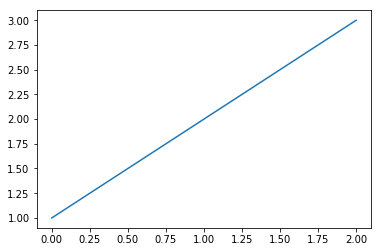

In [2]:
plt.plot([1, 2, 3])

In [7]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [9]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [26]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

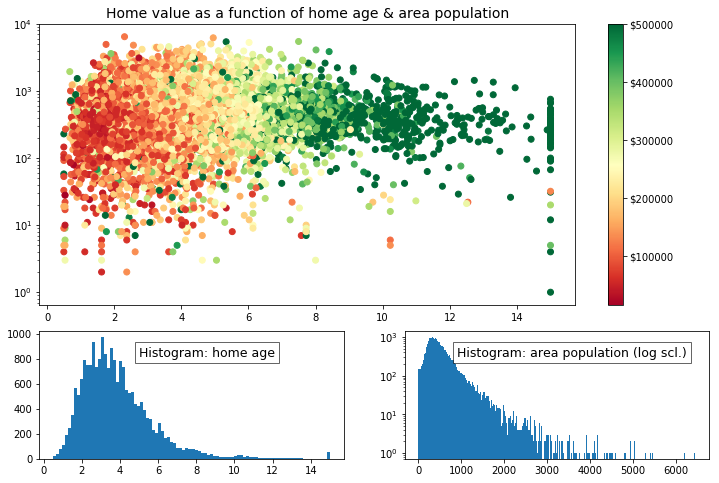

In [29]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

ax1.set_title('Home value as a function of home age & area population', fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

In [ ]:
# A Burst of Color: imshow() and matshow()

In [30]:
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)

In [35]:
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})

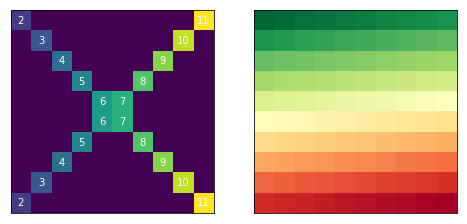

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.matshow(x)
ax1.tick_params(axis='both', which='both', **nolabels)
for i, j in zip(*x.nonzero()):
    ax1.text(j, i, x[i, j], color='white', ha='center', va='center')
    
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
img2 = ax2.matshow(x2, cmap='RdYlGn_r')
ax2.tick_params(axis='both', which='both', **nolabels)

In [47]:
# 
import pandas as pd
import matplotlib.transforms as mtransforms

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True).dropna()
ma = vix.rolling('90d').mean()

In [52]:
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4))

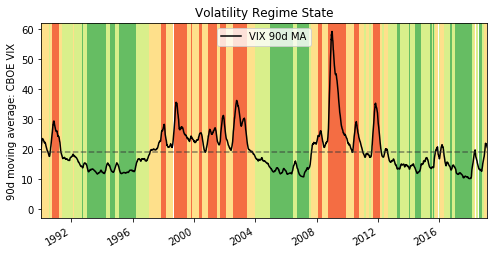

In [63]:
cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4),
        label='VIX 90d MA')
ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i,
                    facecolor=color, transform=trans)
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')